In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
print(data.head())
print(data.info())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [4]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [5]:
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

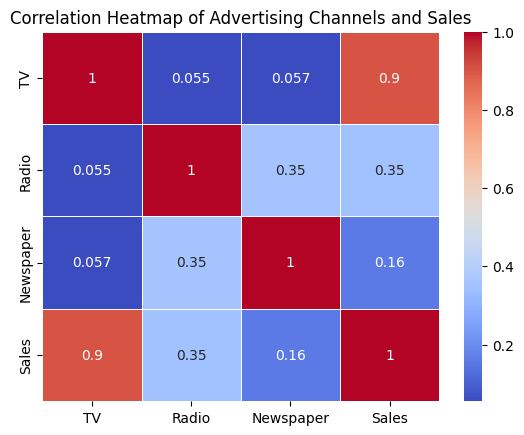

In [8]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Advertising Channels and Sales')
plt.show()

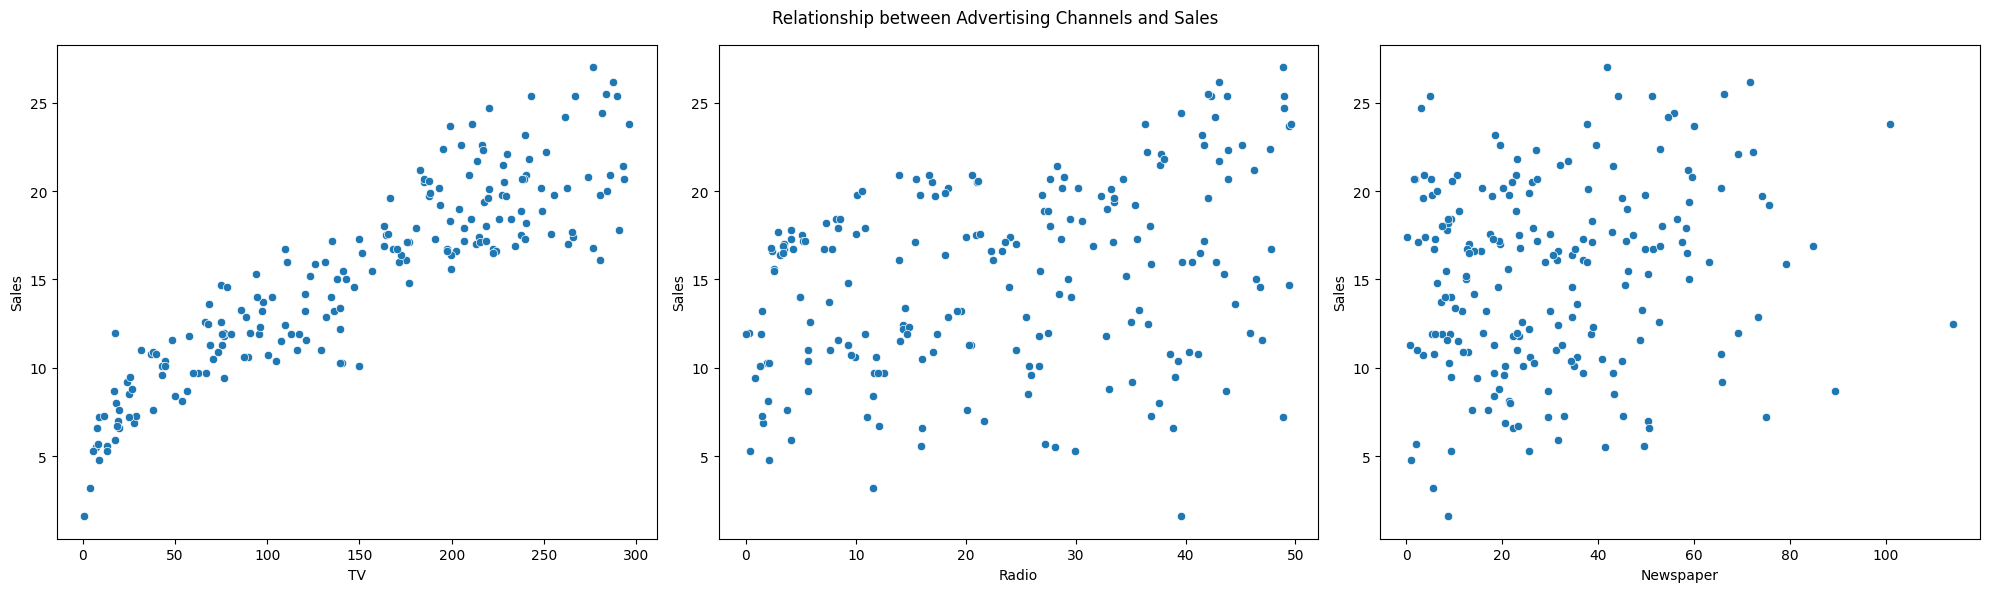

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Relationship between Advertising Channels and Sales')
sns.scatterplot(data=data, x='TV', y='Sales', ax=axes[0])
sns.scatterplot(data=data, x='Radio', y='Sales', ax=axes[1])
sns.scatterplot(data=data, x='Newspaper', y='Sales', ax=axes[2])

plt.tight_layout()
plt.show()

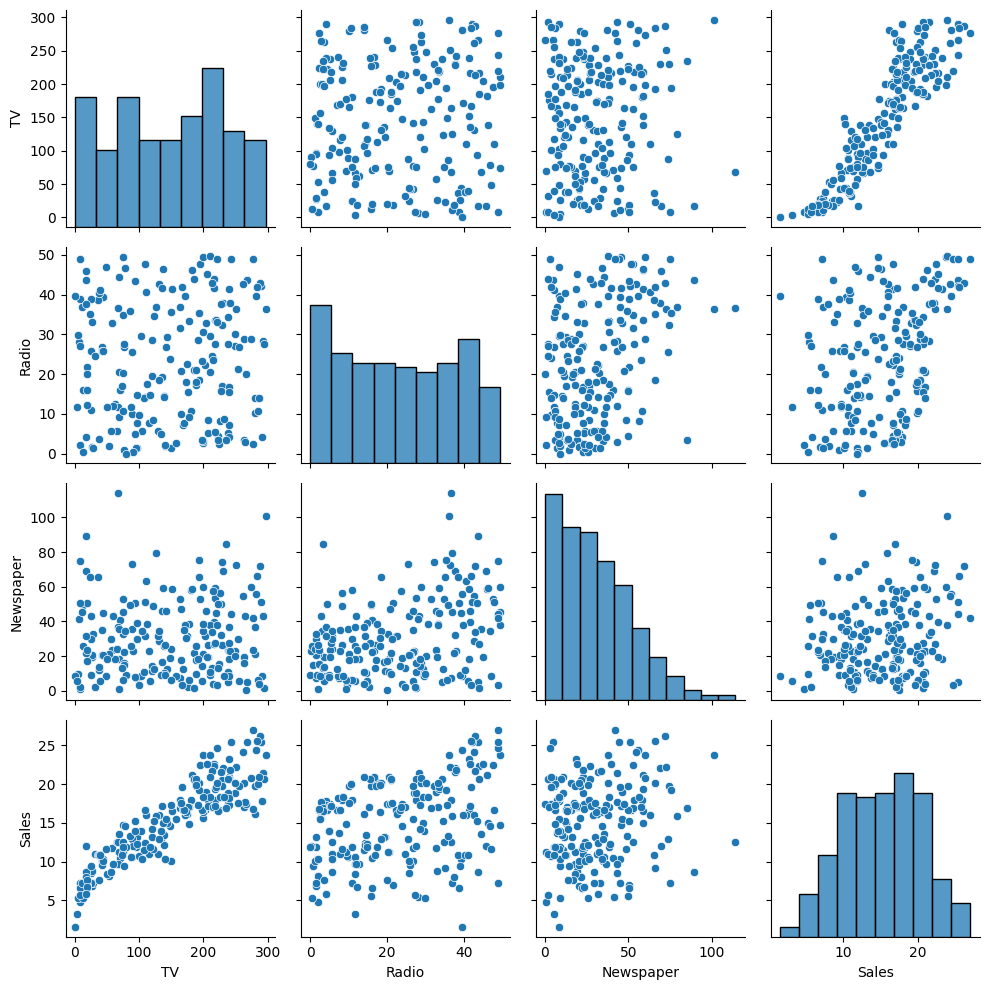

In [10]:
sns.pairplot(data, height=2.5)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
model = LinearRegression()

In [13]:
X = data.drop('Sales', axis=1)
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)


In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:
print("Model Performance:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Model Performance:
Root Mean Squared Error: 1.71
R-squared Score: 0.91


In [18]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337


In [19]:
print(f"\nIntercept: {model.intercept_:.2f}")


Intercept: 4.71


In [20]:
new_data = pd.DataFrame({
    'TV': [200],
    'Radio': [30],
    'Newspaper': [10]
})

predicted_sales = model.predict(new_data)

print(f"Predicted Sales: ${predicted_sales[0]:.2f}")

Predicted Sales: $18.69


In [21]:
def predict_sales(tv, radio, newspaper):
    new_data = pd.DataFrame({
        'TV': [tv],
        'Radio': [radio],
        'Newspaper': [newspaper]
    })
    return model.predict(new_data)[0]

In [22]:
tv_budget = 150
radio_budget = 25
newspaper_budget = 15
predicted_sales = predict_sales(tv_budget, radio_budget, newspaper_budget)
print(f"Predicted Sales for TV={tv_budget}, Radio={radio_budget}, Newspaper={newspaper_budget}: ${predicted_sales:.2f}")

Predicted Sales for TV=150, Radio=25, Newspaper=15: $15.48
